In [195]:
import math
from typing import Tuple

import sys
import os
import matplotlib.pyplot as plt 
import nest_asyncio
nest_asyncio.apply()
import asyncio
import pandas as pd
import seaborn as sns
import numpy as np 
from scipy.stats import linregress
import seaborn as sns
from datetime import datetime
import py4cytoscape as p4c # note that Cytoscape has to be installed and open on your machine for visualisation to work


sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../src')))
from pubmetric import pckg_dev as dev
import pubmetric.network as nw

from style import palette as palette



In [196]:
proteomics_path = '../out/out_20240814142510' 
proteomics_graph = asyncio.run(nw.create_network(inpath=proteomics_path, load_graph=True))

2024-08-28 16:28:49 - Loading graph from ../out/out_20240814142510/graph.pkl.
2024-08-28 16:28:49 - Graph loaded from ../out/out_20240814142510/graph.pkl.
2024-08-28 16:28:49 - Complete data download and graph creation took 0:00:00.010733


In [197]:
cocitations = proteomics_graph.es['score']

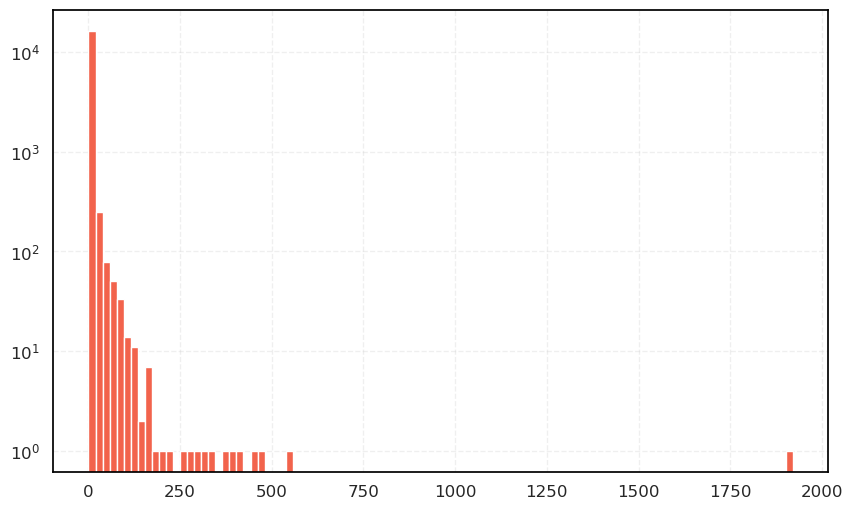

In [198]:
plt.hist(cocitations, bins=100)
plt.yscale('log')
plt.show()

In [222]:
def calculate_desirability(score: float, 
                           thresholds: Tuple[int, int], 
                           inverted:bool = False, 
                           transform: bool = True, 
                           steepness: float = 10.0, 
                           midpoint: float = 0.2) -> float:
    """
    Calculates the desirability score of a given score based on specified upper and lower thresholds and a steepness parameter.

    :param score: The score for which the desirability score is to be calculated.
    :param thresholds: A tuple containing two integers, representing the lower and upper bounds of the desirability range.
    :param steepness: A float controlling how rapidly the desirability increases. Higher values increase steepness.
    :param midpoint: A float determining where the rapid increase starts. Should be between 0 and 1.

    :return: A float representing the desirability score. Returns 0 if the score is below the lower threshold, 
             1 if the score is above or equal to the upper threshold, and a value between 0 and 1 if the score 
             is within the range, scaled according to the steepness and midpoint.
    """
    bottom, top = thresholds

    if inverted:
        score = top - score

    if score < bottom:
        return 0
    elif score >= top:
        return 1
    else:
        normalised_score = (score - bottom) / (top - bottom)
        if transform:
            # Sigmoid function with an adjustable midpoint, for high resolution in the beginnning
            return round(1 / (1 + math.exp(-steepness * (normalised_score - midpoint))), 2)
        return normalised_score 


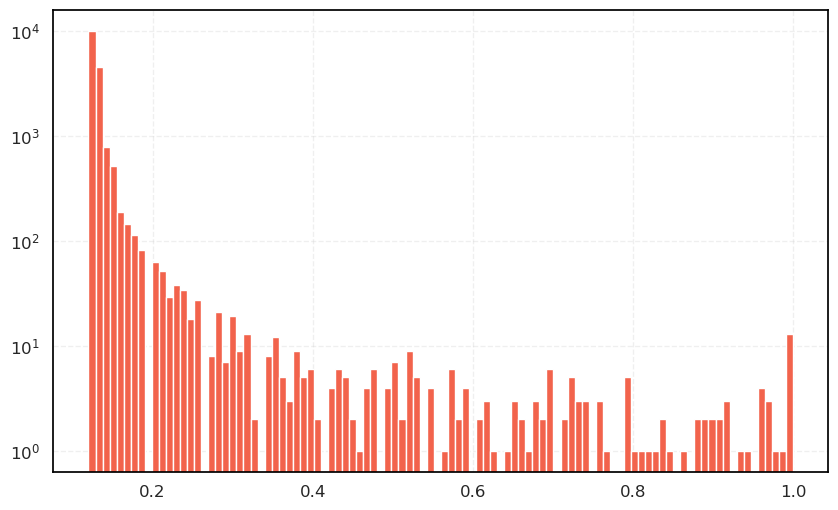

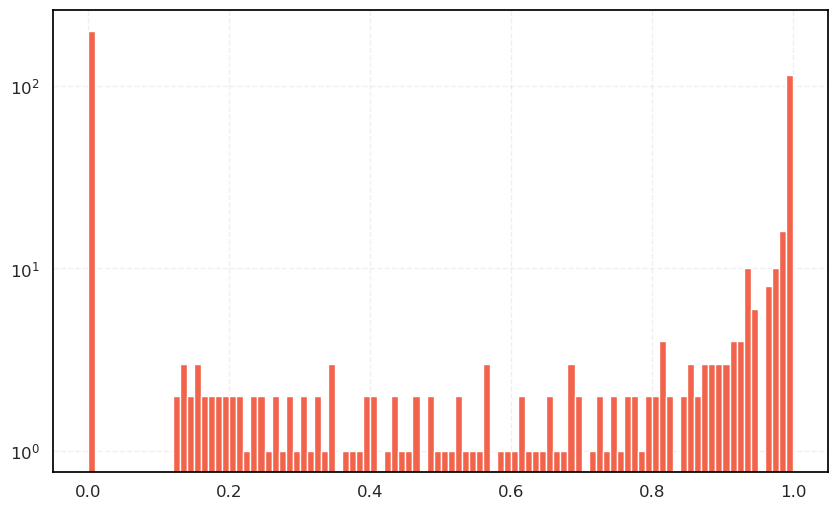

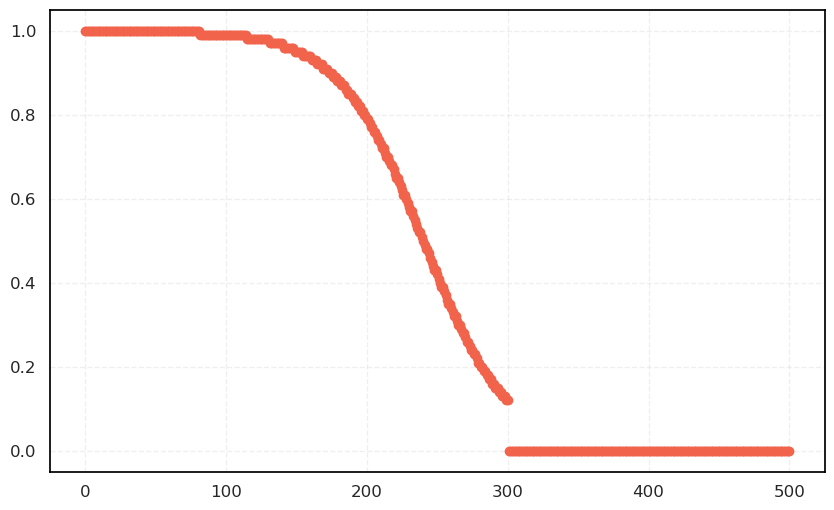

In [223]:
l=[]
m=[]

factor=10
for i, w in enumerate(cocitations):
    value= calculate_desirability(score=w,thresholds= [0, 300], steepness= factor)
    l.append(value)
    if i<=500:
        m.append(calculate_desirability(score=i,thresholds= [0, 300],  steepness= factor, inverted=True))

plt.hist(l, bins=100)
plt.yscale('log')
plt.show()

plt.hist(m, bins=100)
plt.yscale('log')
plt.show()

plt.scatter(range(len(m)), m)
# plt.xscale('log')
plt.show()


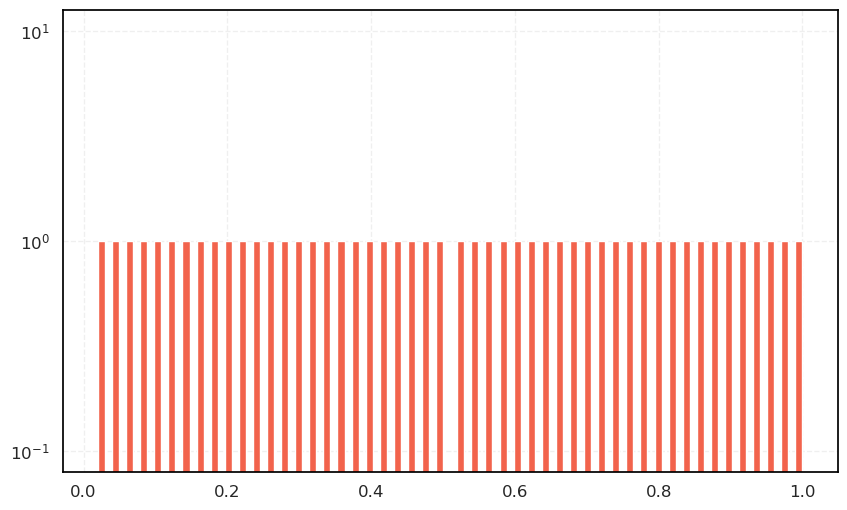

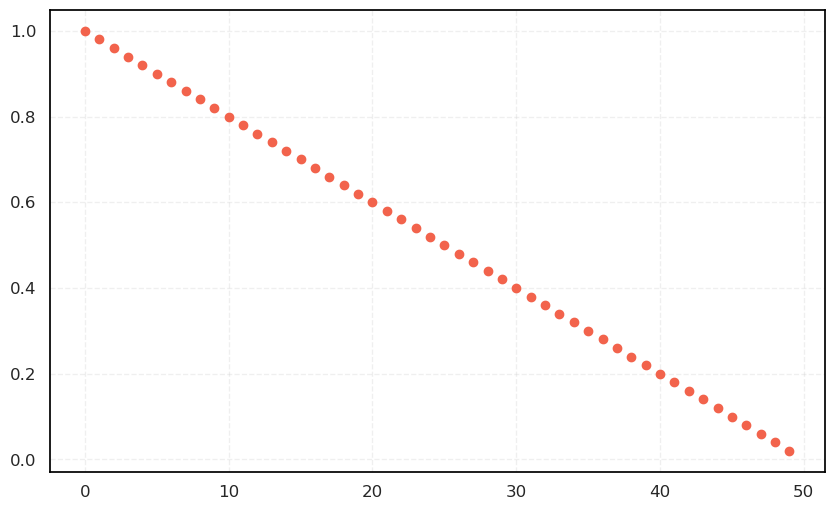

In [232]:
l=[]
m=[]

factor=10
for i in range(50):
    m.append(calculate_desirability(score=i,thresholds= [0, 50],  steepness= factor, inverted=True, transform = False))


plt.hist(m, bins=100)
plt.yscale('log')
plt.show()

plt.scatter(range(len(m)), m)
# plt.xscale('log')
plt.show()
